# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
!pip install gdown
import gdown

url = 'https://drive.google.com/uc?id=1K8jdOmQo8hFN5A8aFeyijECUDbS8pzIp'  # Ganti FILE_ID dengan ID file Drive
output = 'clustering.csv'
gdown.download(url, output, quiet=False)

df = pd.read_csv(output)


Downloading...
From: https://drive.google.com/uc?id=1K8jdOmQo8hFN5A8aFeyijECUDbS8pzIp
To: /content/clustering.csv
100%|██████████| 6.04M/6.04M [00:00<00:00, 27.4MB/s]


In [3]:
df.head()

,Unit_Price,Quantity,Discount,Total_Price,Order_ID,Customer_ID,Customer_Type,Product,Category,Region,Cluster
0,1.87,18.0,0.0,31.98,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,Bremen,0
1,1.64,4.0,0.0,6.56,ORD2300591,CUS6160,B2C,Granini Apple,Juices,Sachsen,0
2,1.74,5.0,0.0,8.70,ORD2638652,CUS4386,B2C,Pepsi,Soft Drinks,Niedersachsen,1
3,1.80,15.0,0.0,27.00,ORD803183,CUS7916,B2C,Hohes C Orange,Juices,Saarland,0
4,0.98,6.0,0.0,5.59,ORD1669739,CUS3794,B2B,Vio Wasser,Water,Niedersachsen,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75563 entries, 0 to 75562
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unit_Price     75563 non-null  float64
 1   Quantity       75563 non-null  float64
 2   Discount       75563 non-null  float64
 3   Total_Price    75563 non-null  float64
 4   Order_ID       75563 non-null  object 
 5   Customer_ID    75563 non-null  object 
 6   Customer_Type  75563 non-null  object 
 7   Product        75563 non-null  object 
 8   Category       75563 non-null  object 
 9   Region         75563 non-null  object 
 10  Cluster        75563 non-null  int64  
dtypes: float64(4), int64(1), object(6)
memory usage: 6.3+ MB


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan label
X = df.drop(columns='Cluster')  # semua fitur
y = df['Cluster']               # label hasil clustering

# Split data menjadi training dan testing set (contoh: 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Cek bentuk datanya
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (60450, 10)
X_test: (15113, 10)
y_train: (60450,)
y_test: (15113,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [6]:
X_train = X_train.drop(columns=['Order_ID', 'Customer_ID'])
X_test = X_test.drop(columns=['Order_ID', 'Customer_ID'])

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60450 entries, 42289 to 39996
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unit_Price     60450 non-null  float64
 1   Quantity       60450 non-null  float64
 2   Discount       60450 non-null  float64
 3   Total_Price    60450 non-null  float64
 4   Customer_Type  60450 non-null  object 
 5   Product        60450 non-null  object 
 6   Category       60450 non-null  object 
 7   Region         60450 non-null  object 
dtypes: float64(4), object(4)
memory usage: 4.2+ MB


In [8]:
from sklearn.preprocessing import LabelEncoder

# Contoh untuk kolom 'Region' dan 'Product'
for col in ['Region', 'Product', 'Category', 'Customer_Type']:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


In [9]:
# Bagian 1: Pelatihan Model
# Definisikan setiap klasifikasi secara terpisah
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [10]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)  0.998941   0.999076  0.998813  0.998944
1            Decision Tree (DT)  1.000000   1.000000  1.000000  1.000000
2            Random Forest (RF)  1.000000   1.000000  1.000000  1.000000
3  Support Vector Machine (SVM)  0.999471   0.998946  1.000000  0.999473
4              Naive Bayes (NB)  0.978429   0.958765  1.000000  0.978949


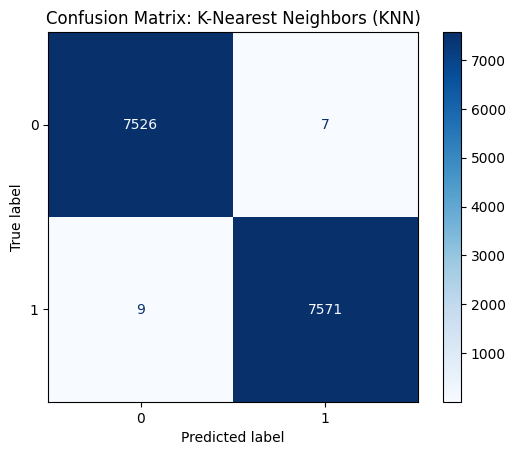

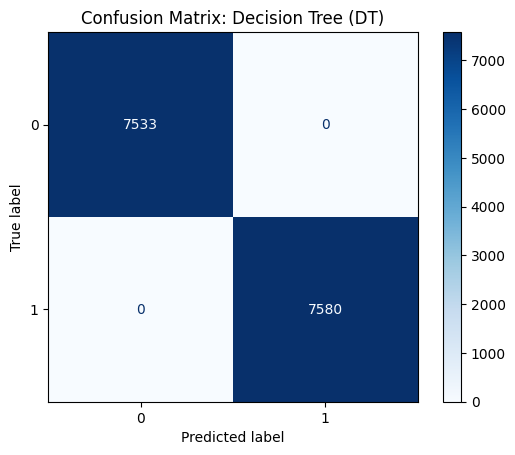

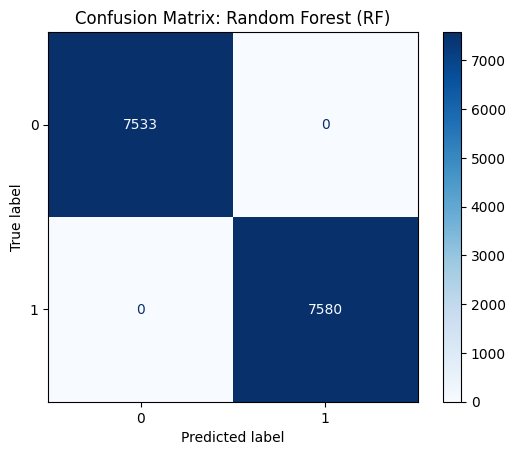

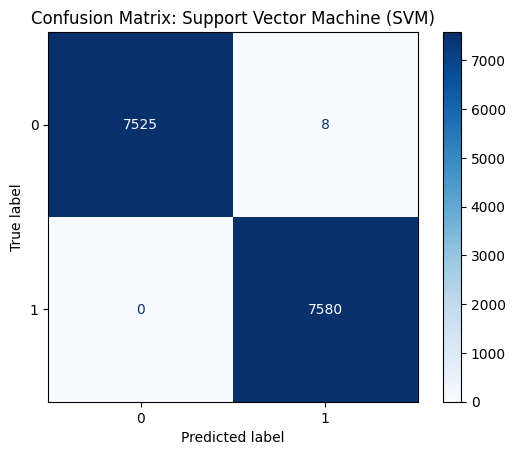

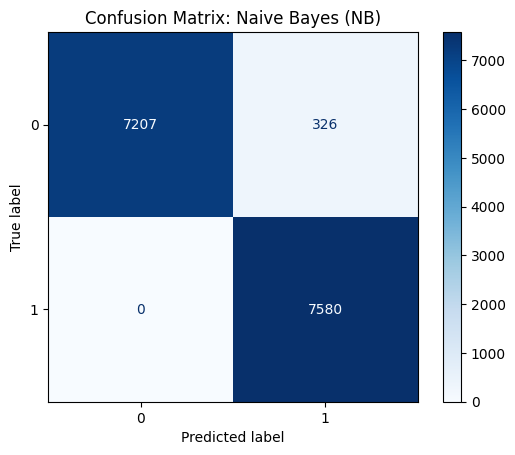

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Tampilkan confusion matrix setiap model
for model_name, model in zip(results.keys(), [knn, dt, rf, svm, nb]):
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.show()


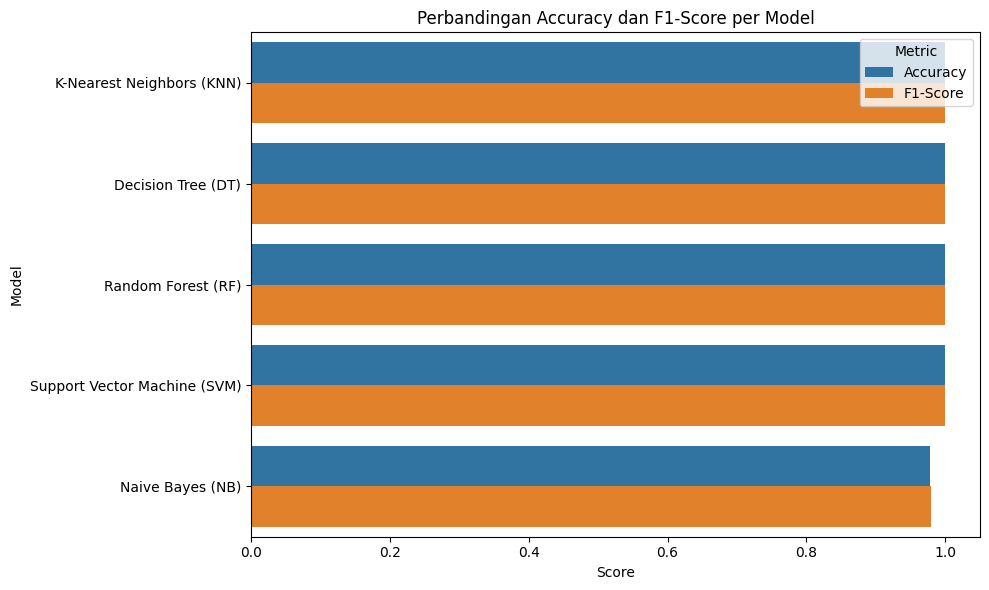

In [12]:
import seaborn as sns

# Visualisasi hasil evaluasi
plt.figure(figsize=(10, 6))
summary_plot = pd.melt(summary_df, id_vars='Model', value_vars=['Accuracy', 'F1-Score'])
sns.barplot(x='value', y='Model', hue='variable', data=summary_plot)
plt.title('Perbandingan Accuracy dan F1-Score per Model')
plt.xlabel('Score')
plt.ylabel('Model')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

**Analisis:**

Decision Tree dan Random Forest menghasilkan performa sempurna pada data uji dengan nilai Accuracy, Precision, Recall, dan F1-Score sebesar 1.00. Ini menunjukkan bahwa kedua model mampu mempelajari pola dari data dengan sangat baik dan tidak melakukan kesalahan prediksi sama sekali pada data uji.

K-Nearest Neighbors (KNN) dan Support Vector Machine (SVM) juga menunjukkan performa yang sangat tinggi dengan akurasi mendekati 100%, hanya sedikit di bawah Decision Tree dan Random Forest.

Naive Bayes (NB) memiliki performa paling rendah dibanding model lain, meskipun tetap cukup baik dengan accuracy sebesar 97.84%. Precision-nya juga lebih rendah dari model lainnya, mengindikasikan adanya kesalahan dalam mengklasifikasikan beberapa kelas.

Kesimpulan:
Jika hanya memilih dua model untuk dibandingkan, Random Forest dan Naive Bayes menjadi contoh perbedaan yang baik:

Random Forest menunjukkan performa sangat tinggi di seluruh metrik.

Naive Bayes masih akurat tetapi performanya lebih rendah terutama pada precision.

Secara keseluruhan, Random Forest adalah algoritma terbaik dalam proyek ini, diikuti oleh Decision Tree, dengan Naive Bayes menjadi model dengan performa relatif terendah.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Identifikasi Kelemahan Model**

- Naive Bayes menunjukkan precision yang relatif rendah (95.88%) dibanding model lainnya. Naive Bayes menunjukkan 326 kasus positif yang diprediksi sebagai negatif.

- Tidak ditemukan nilai recall yang rendah karena semua model mencapai nilai recall sangat tinggi, bahkan sempurna (1.0) pada beberapa model.

- Decision Tree dan Random Forest menunjukkan performa sempurna (accuracy = 1.0) pada data uji. Ini bisa menjadi indikasi overfitting, terutama pada Decision Tree, yang dikenal cenderung mempelajari data terlalu detail. Perlu diuji dengan data baru atau dilakukan validasi silang (cross-validation) untuk memastikan generalisasi model.